# Exploratory data analysis

### Imports

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.pandas.set_option('display.max_columns', None)

### Load data

In [4]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Remove Id variable

In [5]:
data.drop('Id', axis=1, inplace=True)   
data.shape

(1460, 80)

### Distribution of target variable (`SalePrice`)

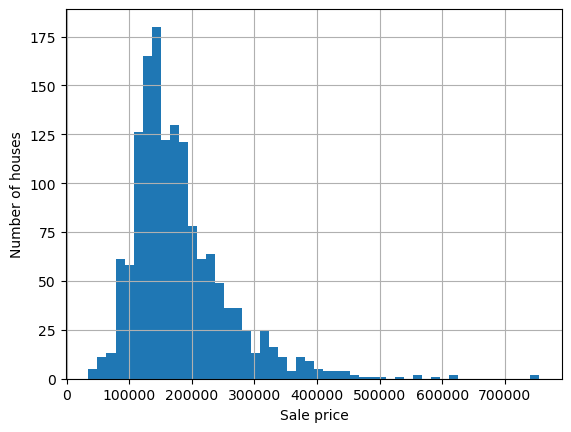

In [6]:
data['SalePrice'].hist(bins=50)
plt.ylabel('Number of houses')
plt.xlabel('Sale price')
plt.show()

Sale price is skewed. Have a look at log(sale price).

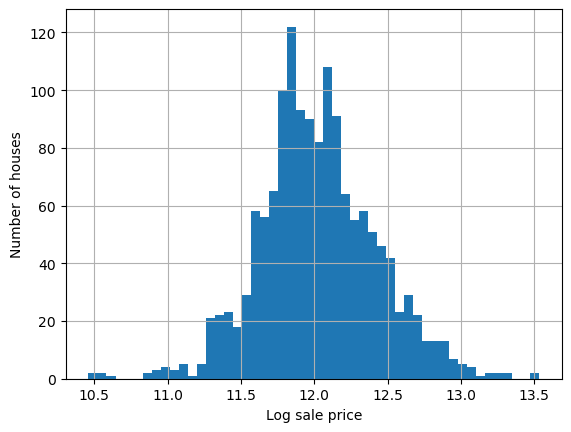

In [7]:
np.log(data['SalePrice']).hist(bins=50)
plt.ylabel('Number of houses')
plt.xlabel('Log sale price')
plt.show()

Much better. Log sale price more normally distributed.

### Identify categorical and numerical variables.

In [8]:
cat_vars = [var for var in data.columns if data[var].dtype=='O']
print(len(cat_vars))
# 'MSSubClass' is also categorical, so add it to the list

cat_vars += ['MSSubClass']
print(len(cat_vars))    

43
44


Cast variables as categorical

In [9]:
data[cat_vars] = data[cat_vars].astype('O')

Numerical variables

In [10]:
num_vars = [
    var for var in data.columns if var not in cat_vars and var!='SalePrice'
]

print(len(num_vars))

35


### Missing values

In [11]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

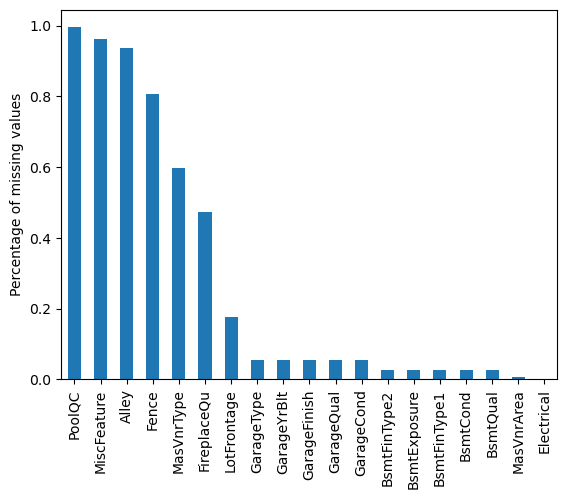

In [12]:
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Percentage of missing values');

Categorical and numerical variables with missing values

In [13]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print("Number of cat vars with na: ", len(cat_na))
print("Number of num vars with na: ", len(num_na))

Number of cat vars with na:  16
Number of num vars with na:  3


In [14]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [15]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Mean sale price against binary missing/not-missing, for all variables with missing values

In [16]:
def analyze_na_value(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 1, 0)
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind='barh', y='mean', xerr='std', 
        title=var, legend=False, figsize=(6, 1))
    plt.show()

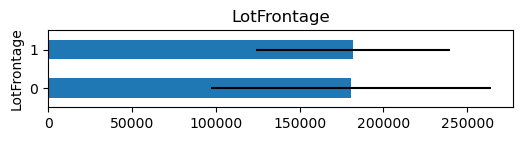

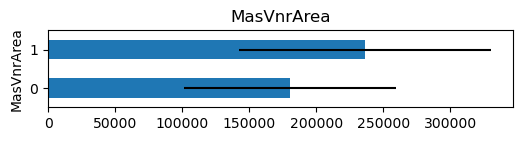

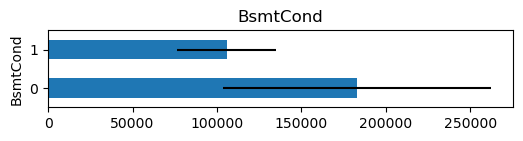

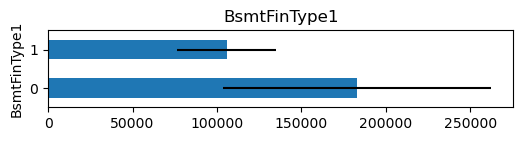

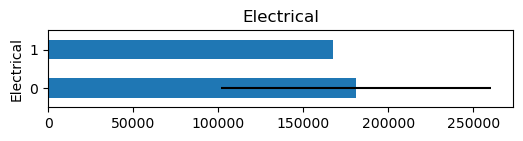

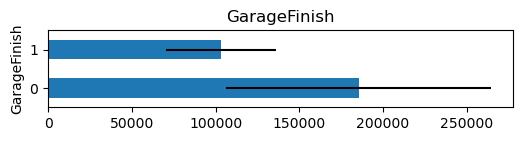

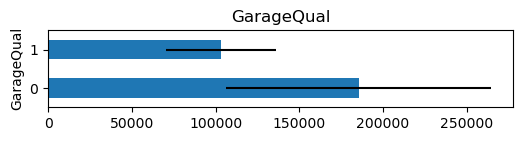

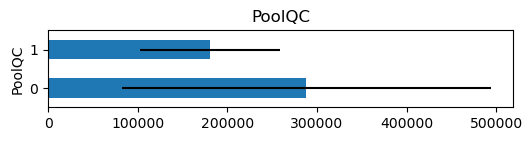

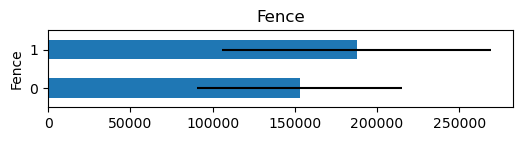

In [17]:
for var in vars_with_na:
    analyze_na_value(data, var)

### Temporal variables

In [18]:
data[num_vars].head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [19]:
year_vars = [var for var in num_vars if 'Year' in var or 'Yr' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [20]:
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Plot median sale price vs year in which house sold

In [21]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median sale price')
plt.show()

Plot median sale price vs year in which house built

In [22]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median sale price')
plt.show()

Plot the median difference between year sold and the other year vars (year built, year remodelled, and year garage built) vs year sold.

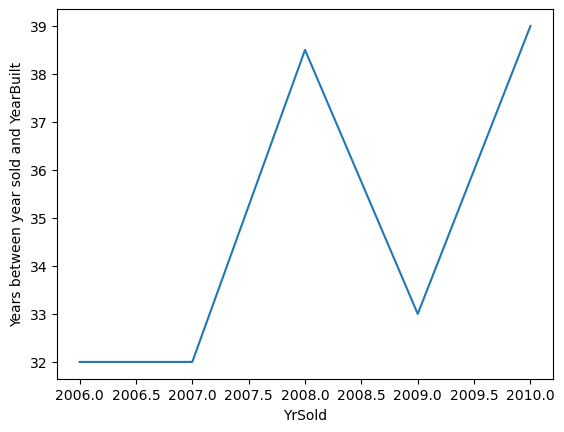

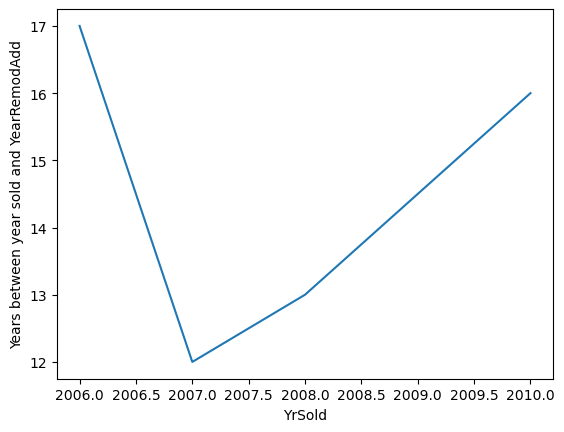

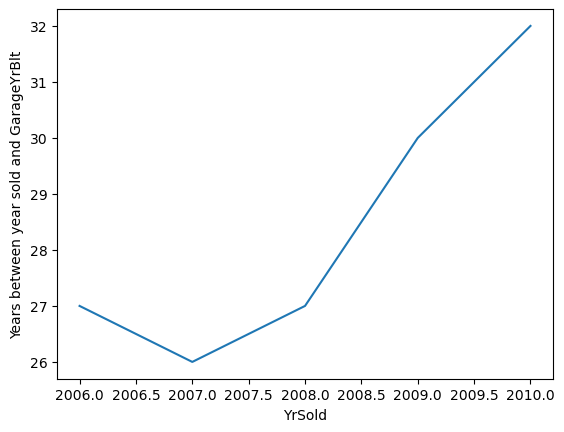

In [23]:
def analyze_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Years between year sold and ' + var)
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        analyze_year_vars(data, var)

Interpretation of last plot above. In 2010 the typical house sold had a garage that was built 32 years before sale. In 2007, the typical house sold had a garage that was built 26 years before sale. ~ Similar interpretation for other plots. 

In 2010 the houses sold are older, and older houses sell for less. That may explain why median sale price in 2010 is lower than in other years.

Now plot sale price vs difference between year sold and (year built, year remodelled, year garage built), as a scatter plot.

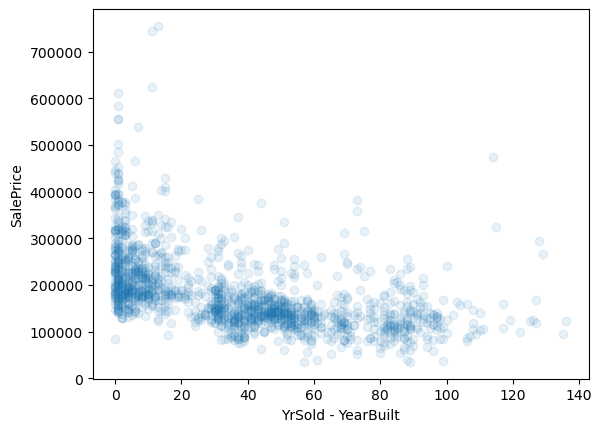

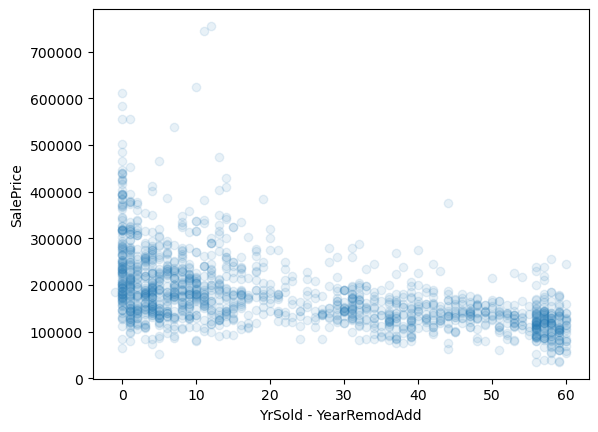

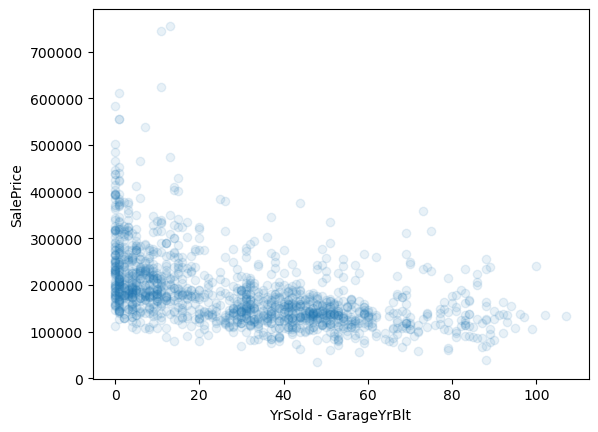

In [24]:
def sale_price_vs_year_diffs(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    plt.scatter(df[var], df['SalePrice'], alpha=0.1)
    plt.xlabel('YrSold - ' + var)
    plt.ylabel('SalePrice')
    plt.show()

for var in year_vars:
    if var != 'YrSold':
        sale_price_vs_year_diffs(data, var)

### Discrete variables

In [25]:
discrete_vars = [var for var in num_vars 
    if len(data[var].unique()) < 20 and var not in year_vars]

print(len(discrete_vars))

data[discrete_vars].head()

13


OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

Plot sale price vs variable value for discrete variables.

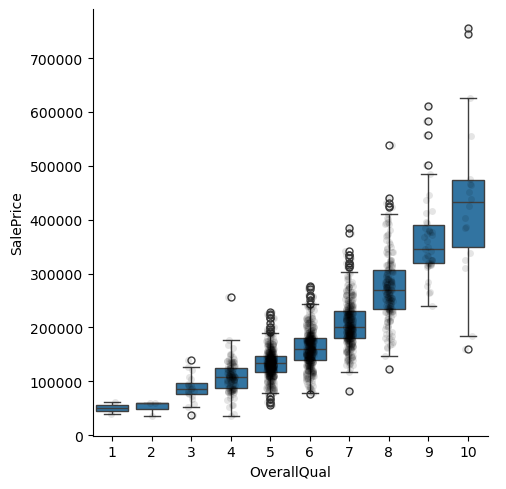

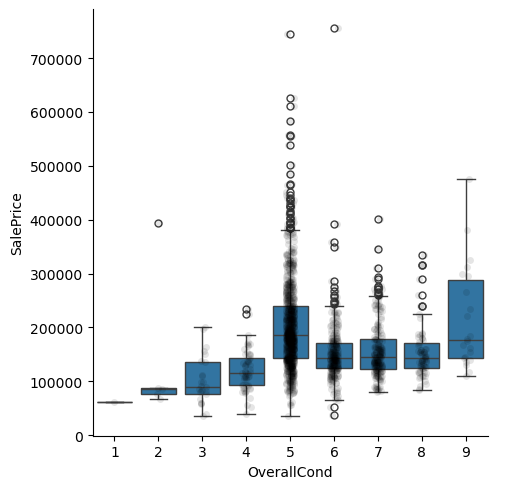

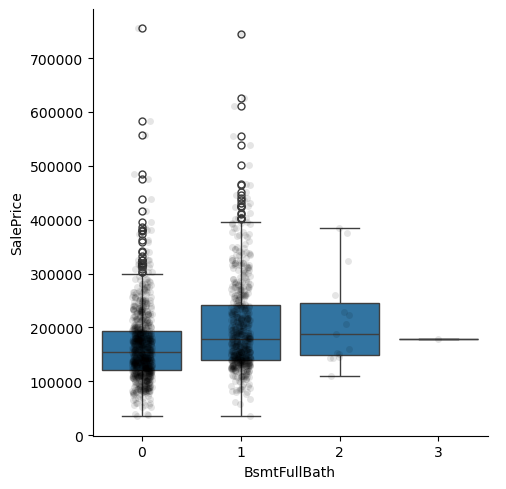

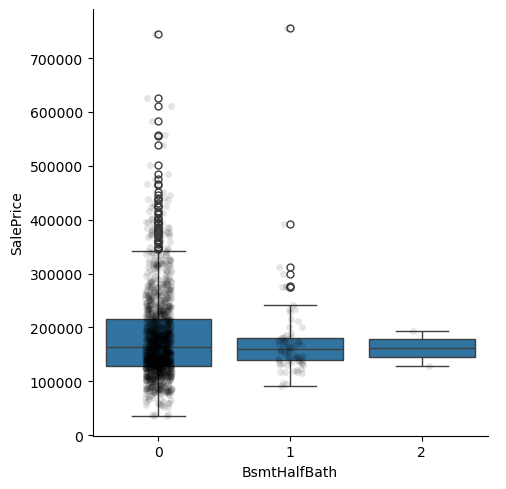

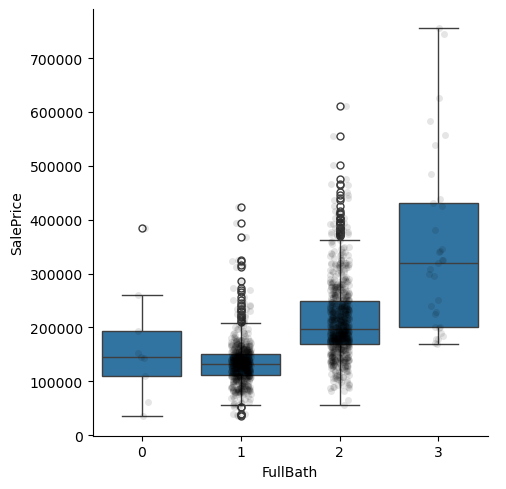

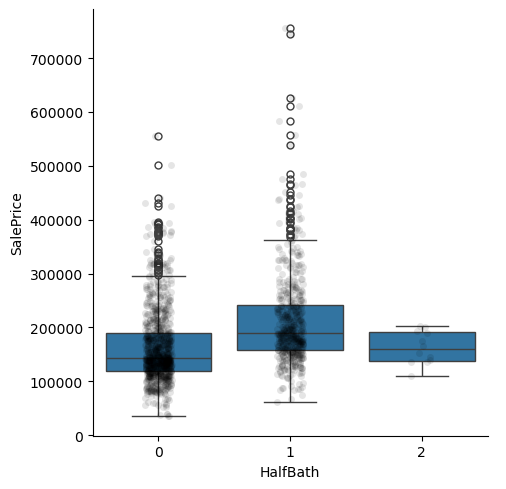

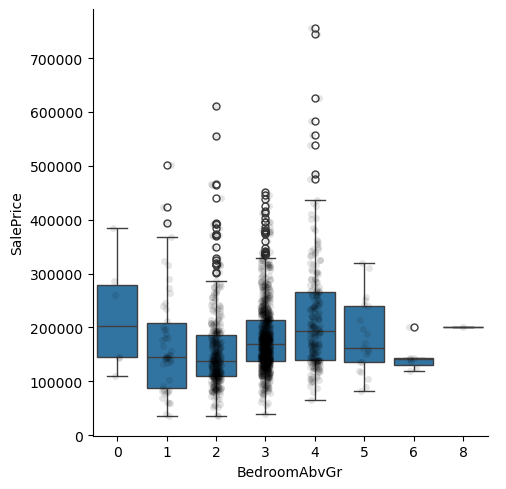

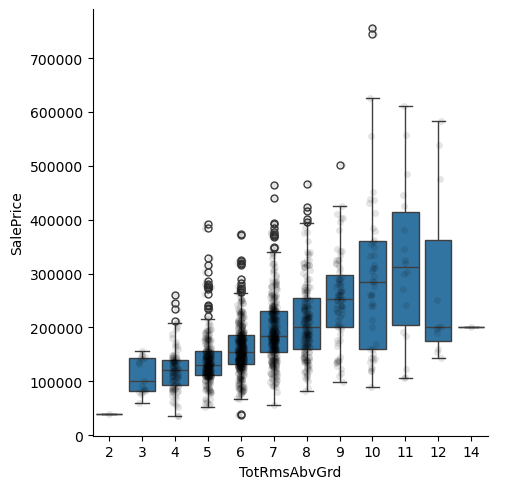

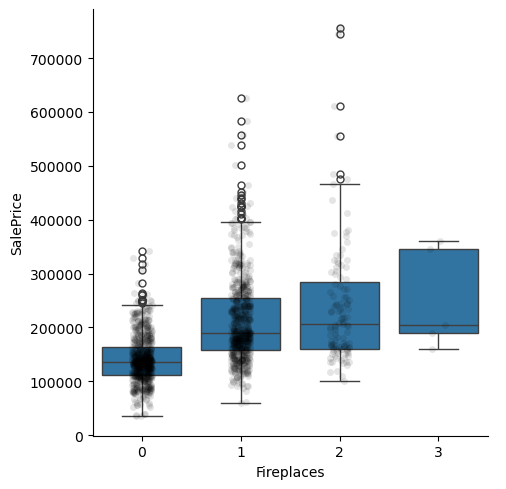

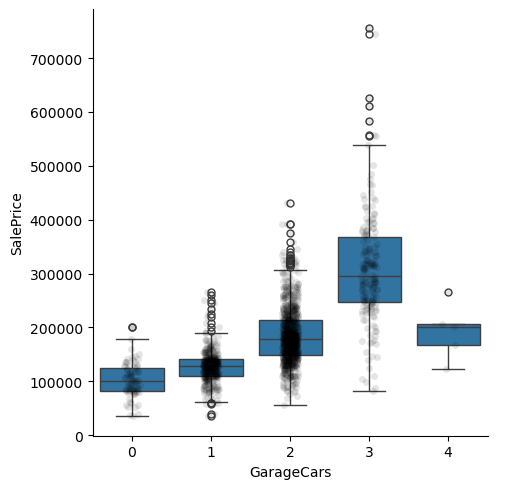

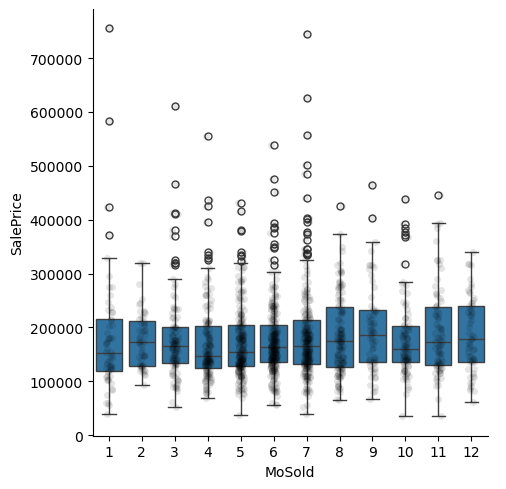

In [26]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind='box')
    sns.stripplot(x=var, y='SalePrice', data=data, color='k', alpha=0.1)
    plt.show()

### Continuous variables

In [27]:
cont_vars = [var for var in num_vars if var not in discrete_vars and var not in year_vars]

print(len(cont_vars))

data[cont_vars].head()  

18


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

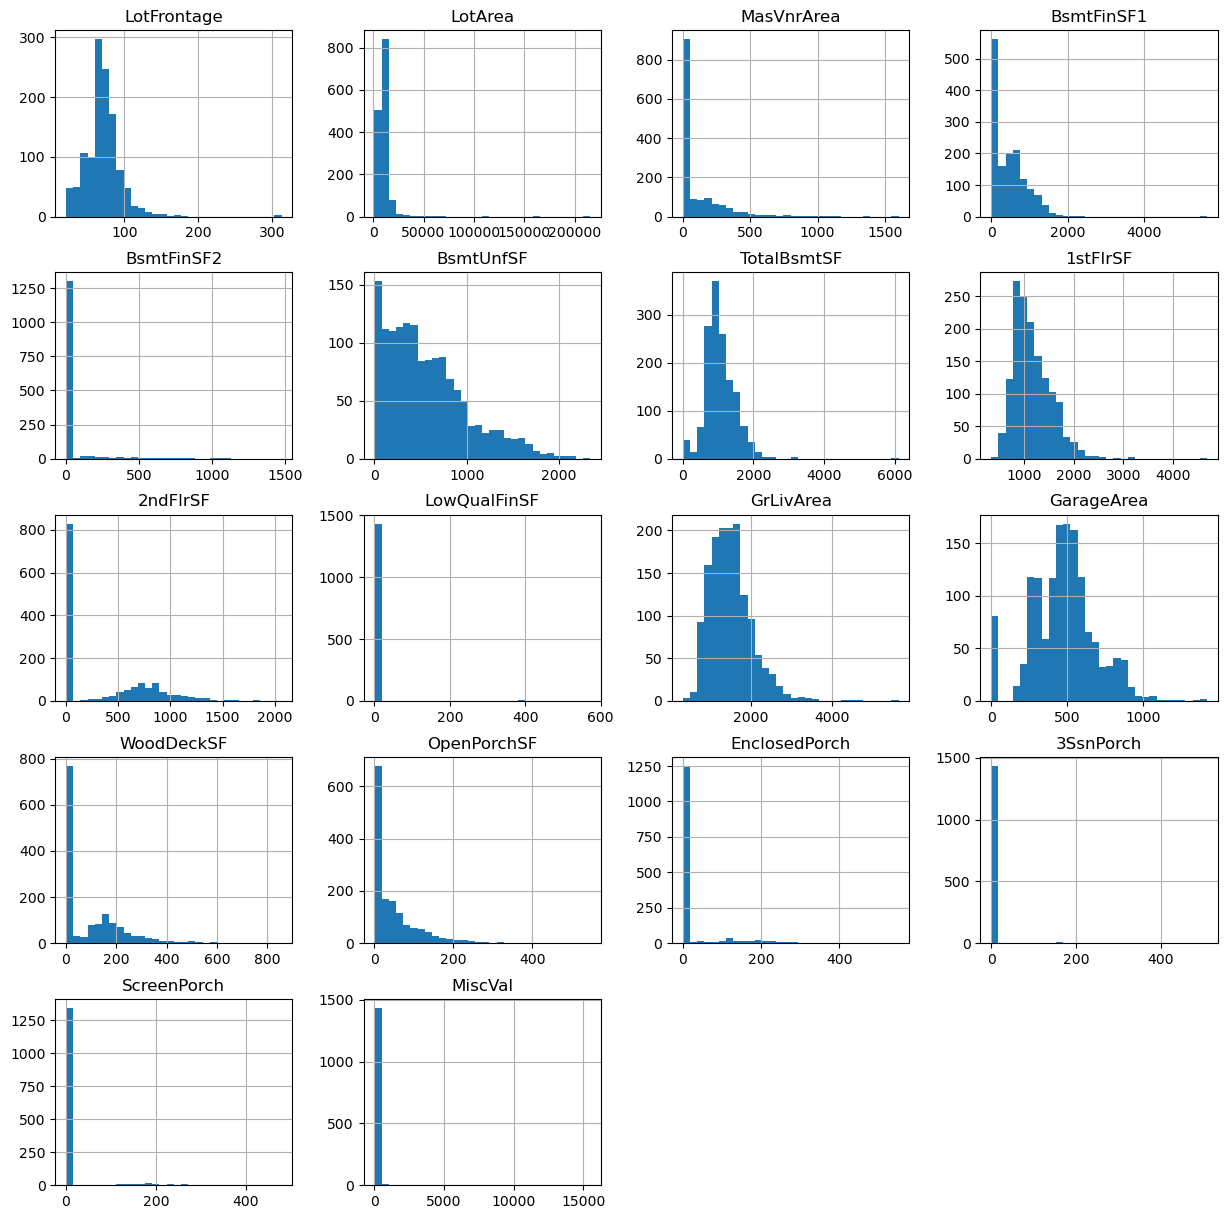

In [28]:
data[cont_vars].hist(bins=30, figsize=(15, 15));

List of very skewed variables:

In [29]:
skewed_vars = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

The remaining continuous variables:

In [30]:
cont_vars = [var for var in cont_vars if var not in skewed_vars]  
cont_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

### Yeo-Johnson transformation

LotFrontage
MasVnrArea


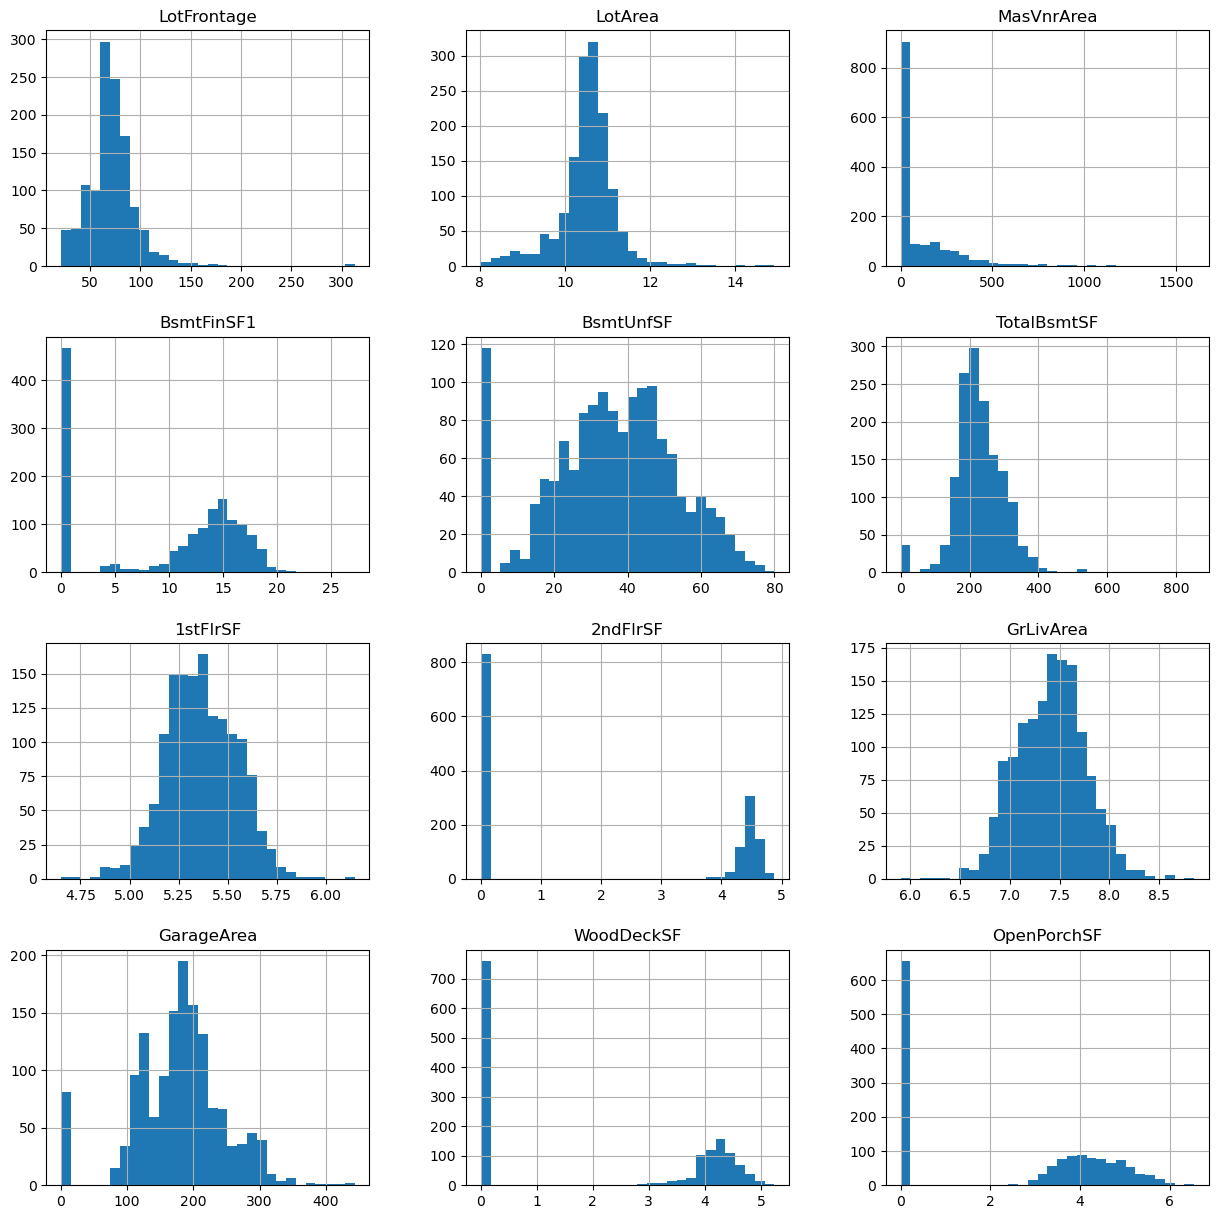

In [31]:
tmp = data.copy()

for var in cont_vars:
    try:
        tmp[var], param = stats.yeojohnson(data[var])
    except:
        print(var)
tmp[cont_vars].hist(bins=30, figsize=(15, 15));

Plot log sale price vs (untransformed and transformed) continuous variables.

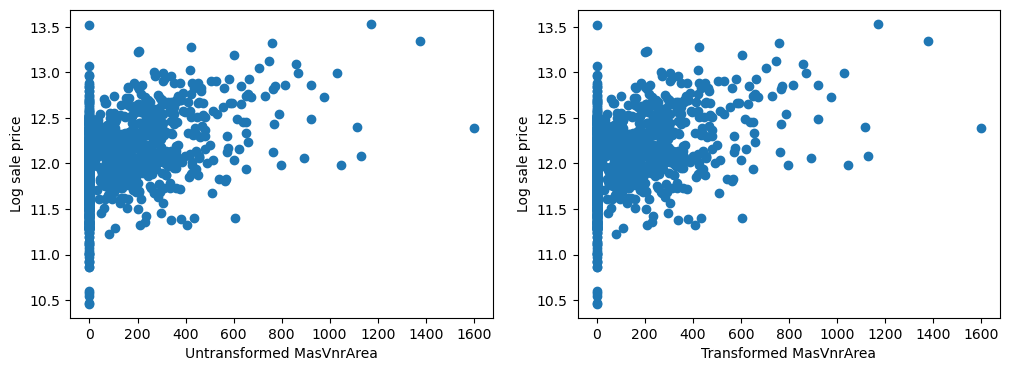

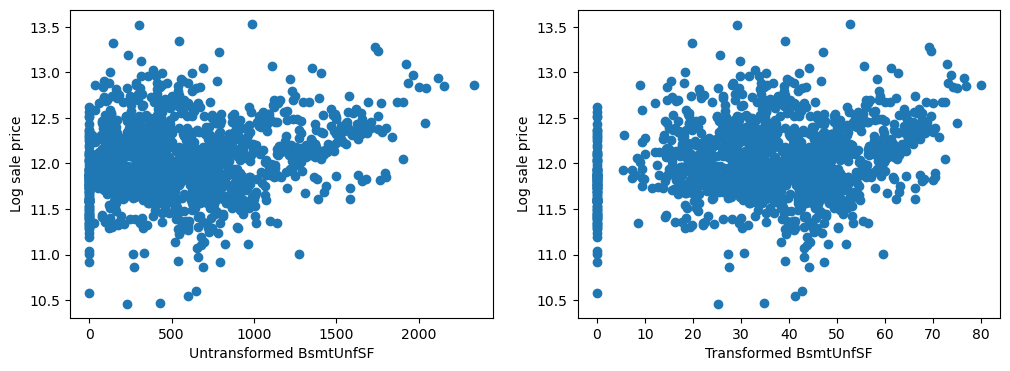

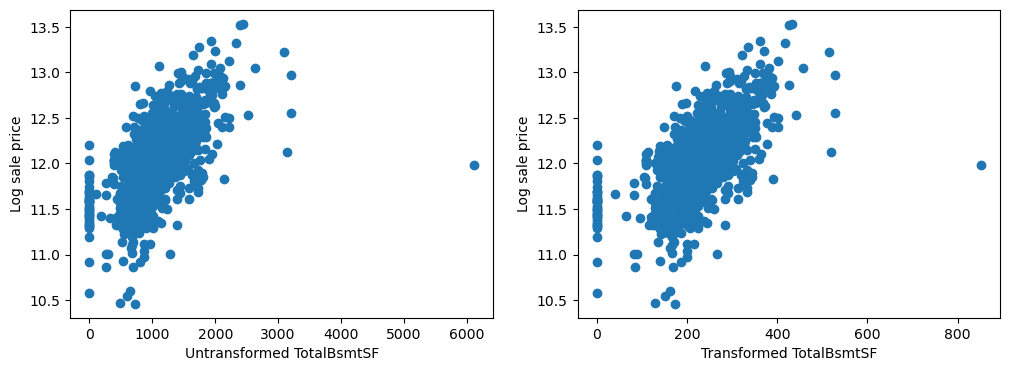

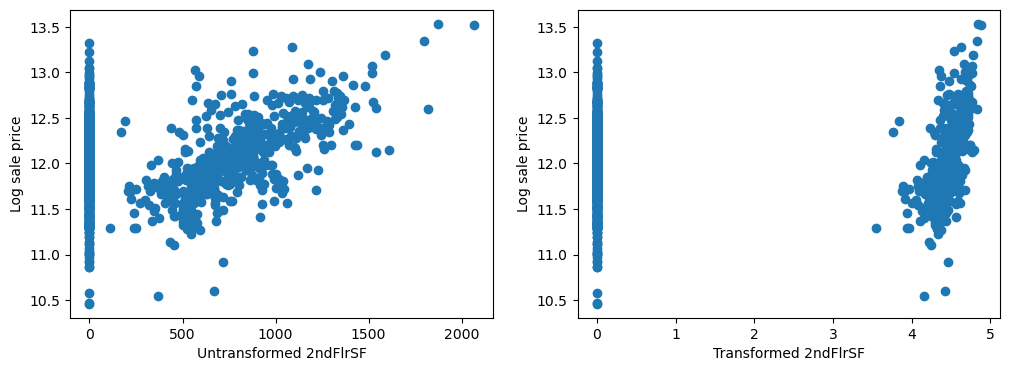

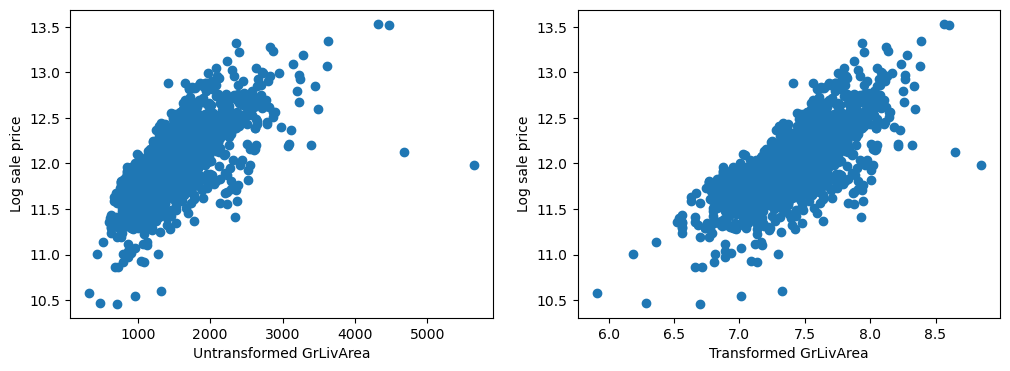

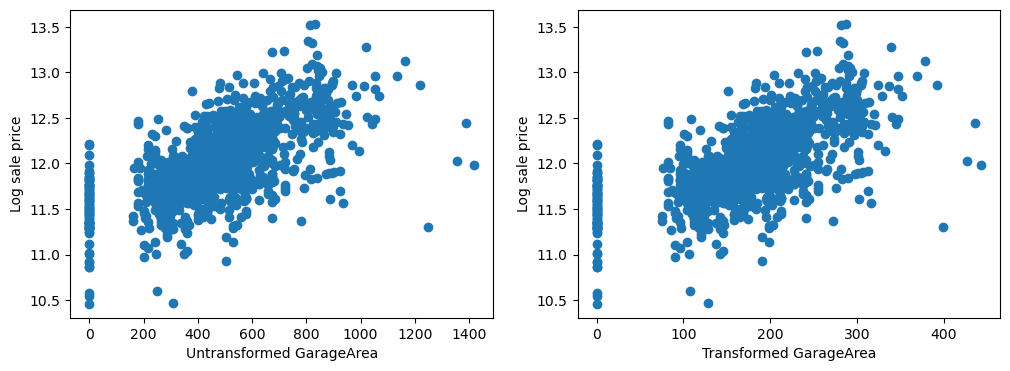

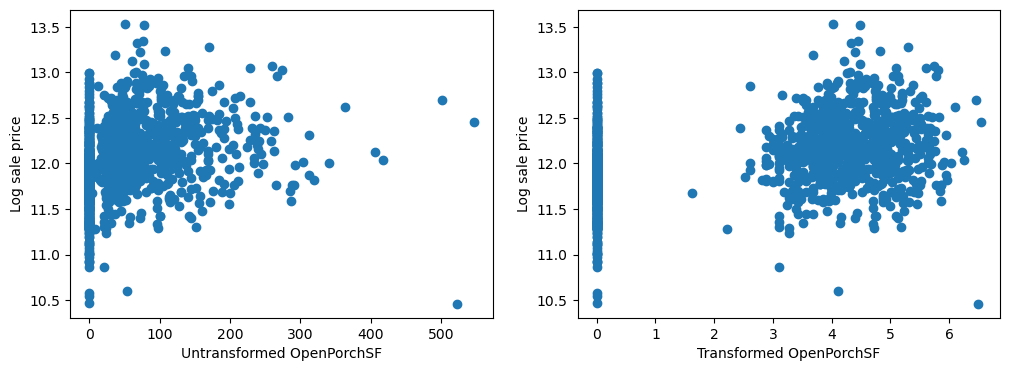

In [32]:
for var in cont_vars:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Log sale price')
    plt.xlabel('Untransformed ' + var)

    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(data['SalePrice']))
    plt.ylabel('Log sale price')
    plt.xlabel('Transformed ' + var)

    plt.show()

Apply log transformation to variables with only positive values.

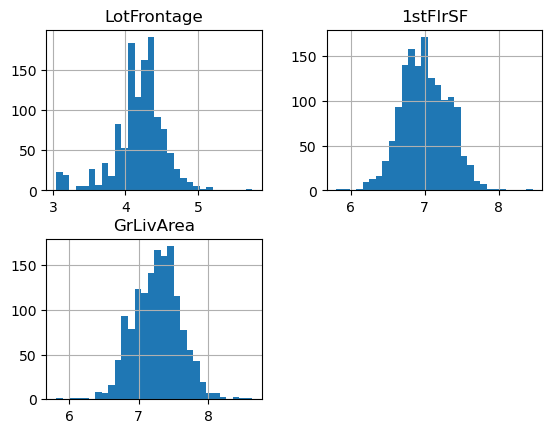

In [33]:
tmp = data.copy()

for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    tmp[var] = np.log(data[var])

tmp[['LotFrontage', '1stFlrSF', 'GrLivArea']].hist(bins=30);

Plot log sale price vs (untransformed and transformed) variables:

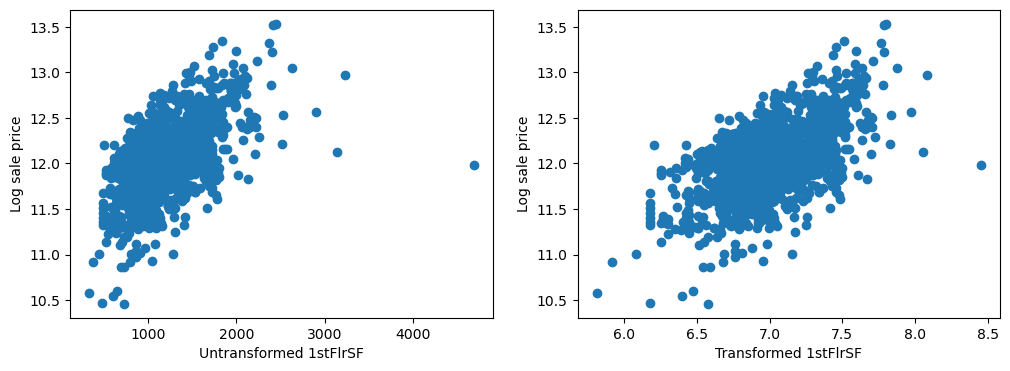

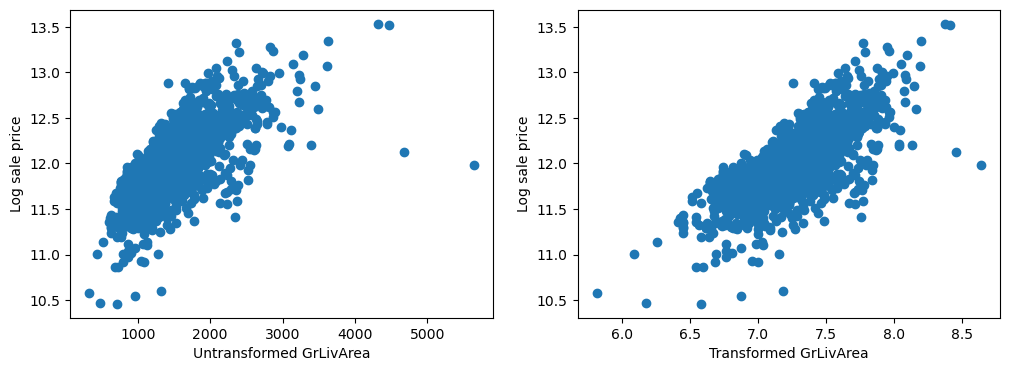

In [34]:
for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Log sale price')
    plt.xlabel('Untransformed ' + var)

    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(data['SalePrice']))
    plt.ylabel('Log sale price')
    plt.xlabel('Transformed ' + var)

    plt.show()

Apply binary transformation to skewed variables.

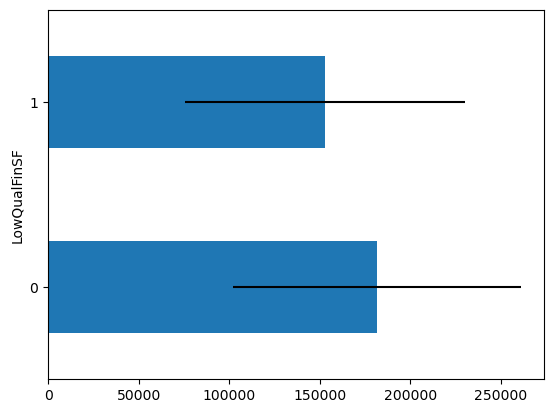

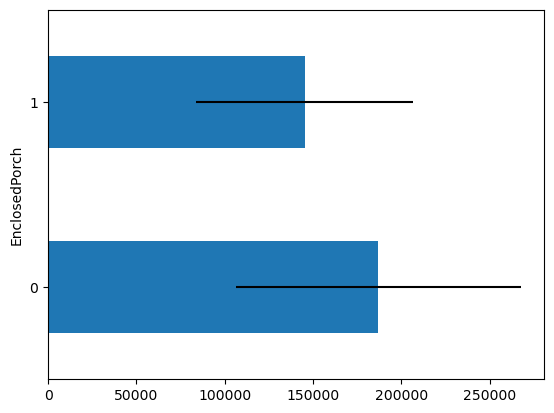

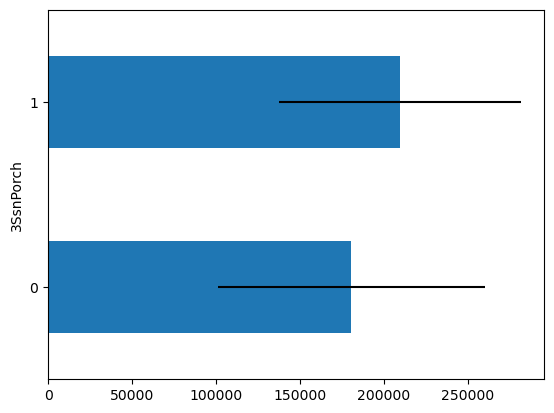

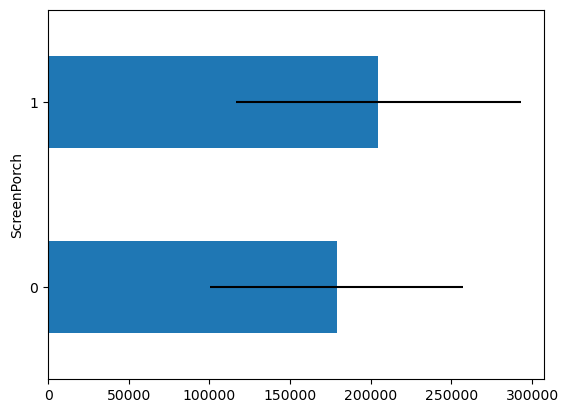

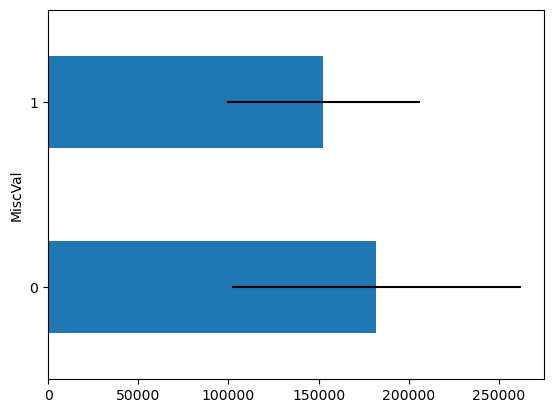

In [35]:
for var in skewed_vars:
    tmp = data.copy()
    tmp[var] = np.where(data[var]==0, 0, 1)
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind='barh', y='mean', xerr='std', legend=False)
    plt.show()

### Categorical variables

In [36]:
print(len(cat_vars))

data[cat_vars].head()

44


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

Number of unique values

In [37]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 6)); 

Quality variables

In [38]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [39]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [40]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [41]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [42]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [43]:
qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

In [44]:
data[qual_vars].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          4          3       4.0       3.0          5            4   
1          3          3       4.0       3.0          5            3   
2          4          3       4.0       3.0          5            4   
3          3          3       3.0       4.0          4            4   
4          4          3       4.0       3.0          5            4   

   FireplaceQu  GarageQual  GarageCond  BsmtFinType1  BsmtFinType2  \
0          NaN         3.0         3.0           6.0           1.0   
1          3.0         3.0         3.0           5.0           1.0   
2          3.0         3.0         3.0           6.0           1.0   
3          4.0         3.0         3.0           5.0           1.0   
4          3.0         3.0         3.0           6.0           1.0   

   BsmtExposure  GarageFinish  Fence  
0           1.0           2.0    NaN  
1           4.0           2.0    NaN  
2           2.0           2.0    NaN  
3           1.0           1.0    NaN  
4           3.0           2.0    NaN

Plot sale price against quality for each of the quality_vars.

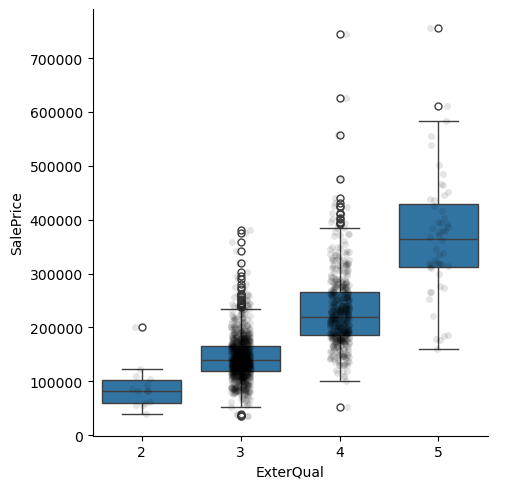

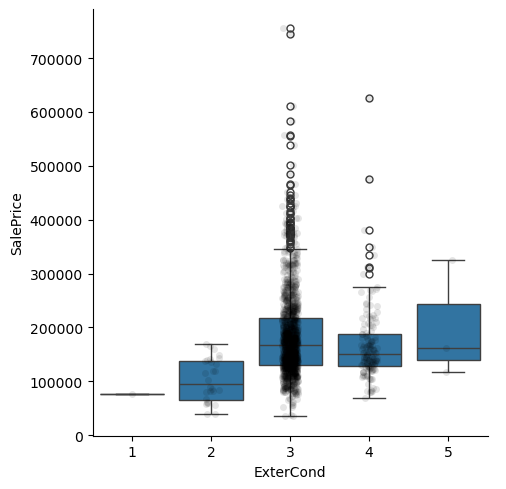

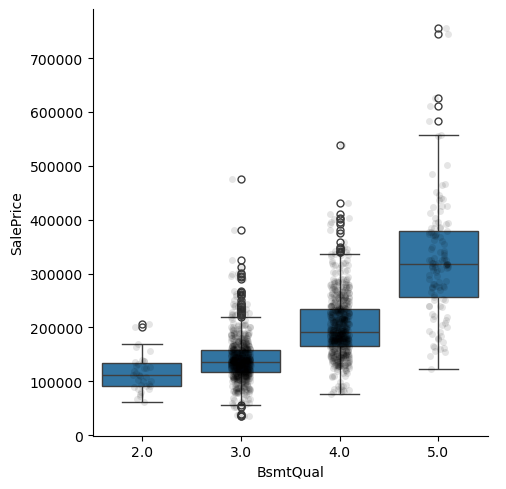

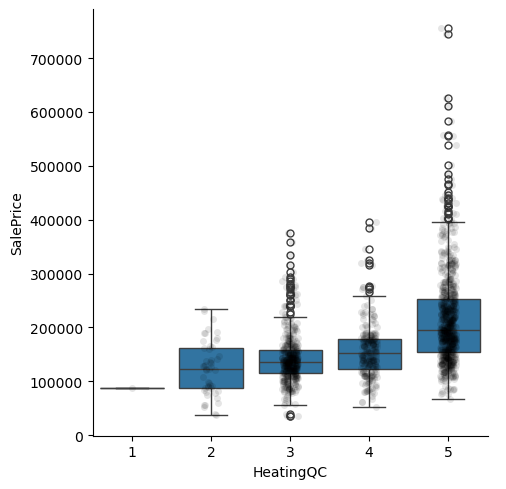

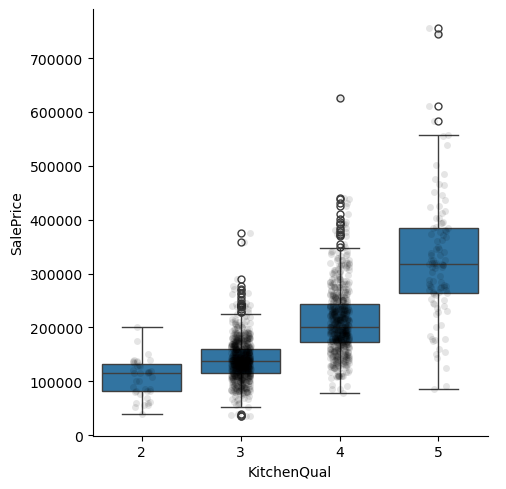

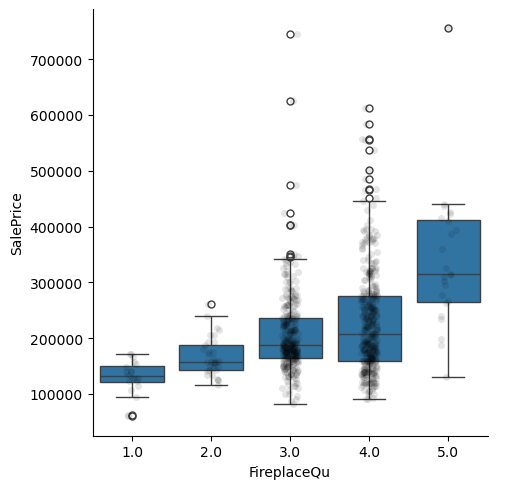

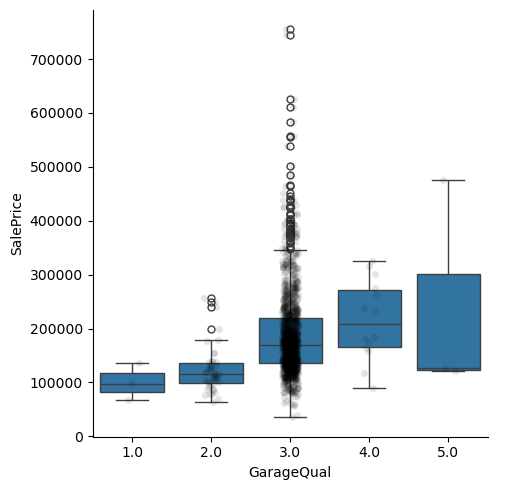

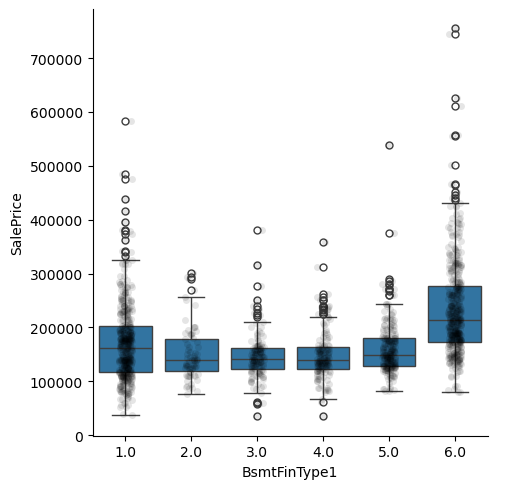

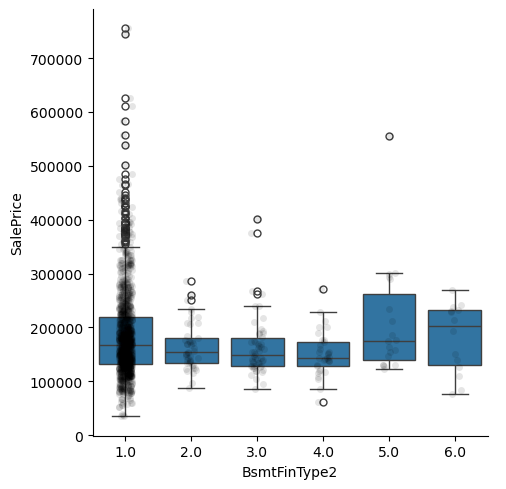

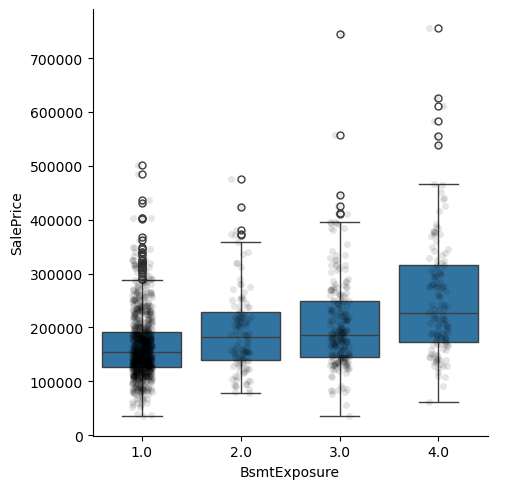

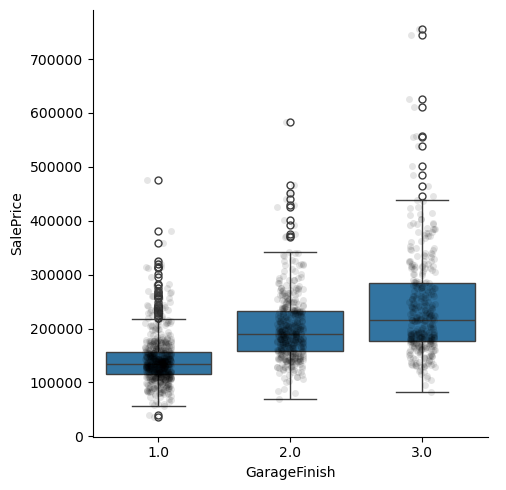

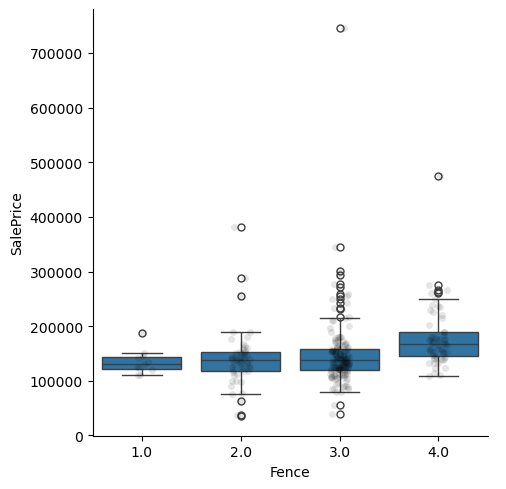

In [45]:
for var in qual_vars:
    sns.catplot(x=var, y='SalePrice', data=data, kind='box')
    sns.stripplot(x=var, y='SalePrice', data=data, color='k', alpha=0.1)
    plt.show()

Other categorical variables

In [46]:
cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

Rare labels

In [49]:
def analyze_rare_labels(df, var, rare_percentage):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp < rare_percentage]

for var in cat_others:
    print(analyze_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Plot sale price against category, for variables in the `cat_others` list.

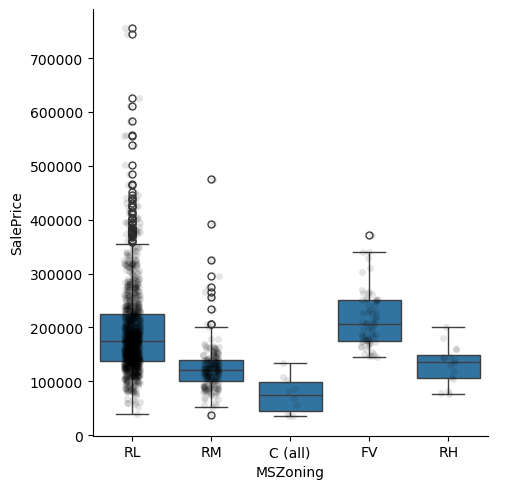

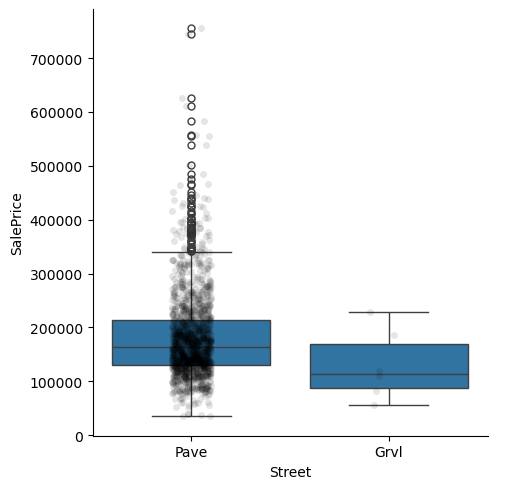

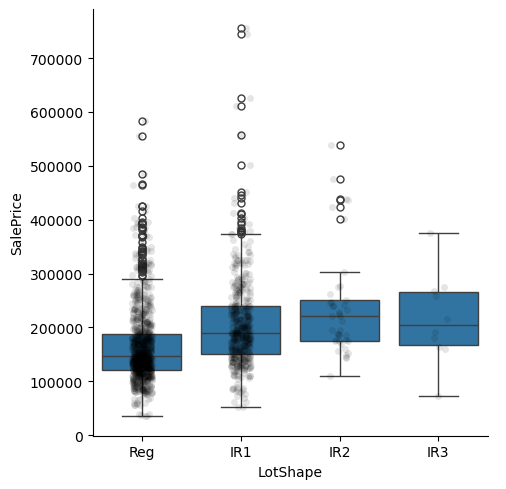

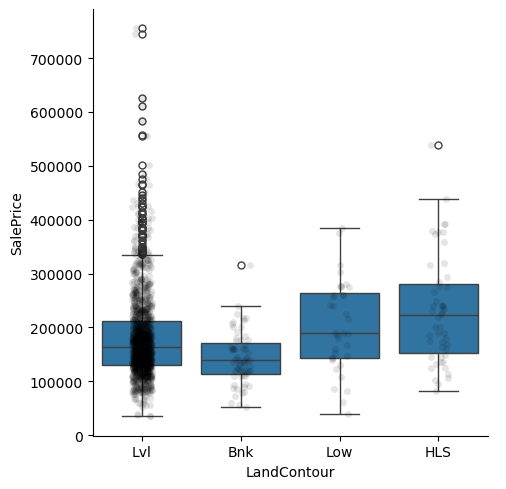

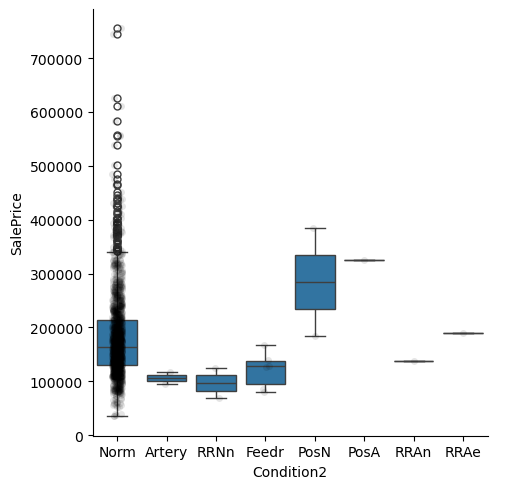

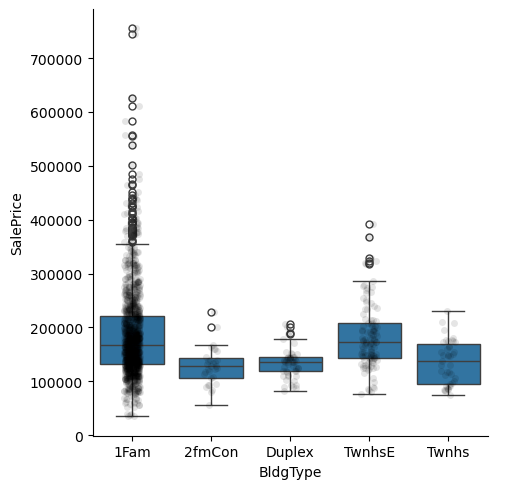

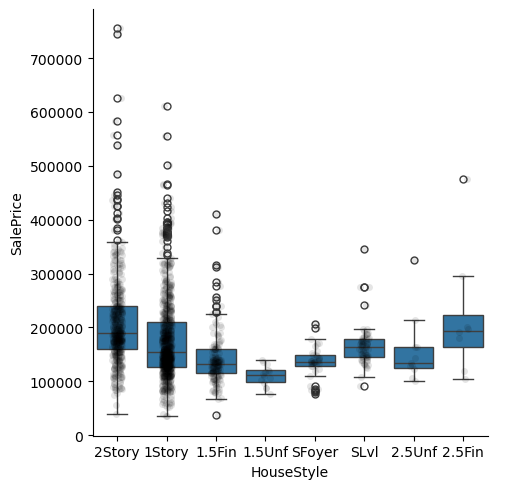

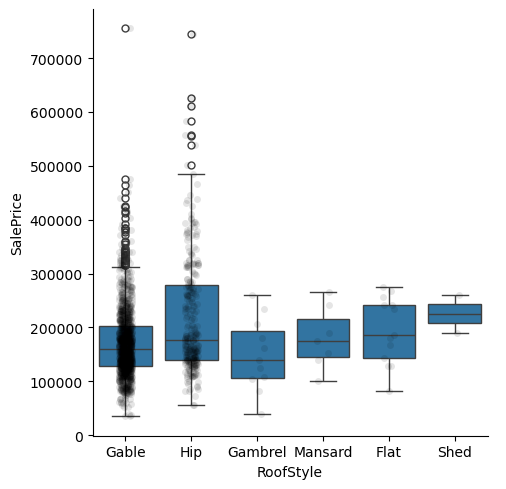

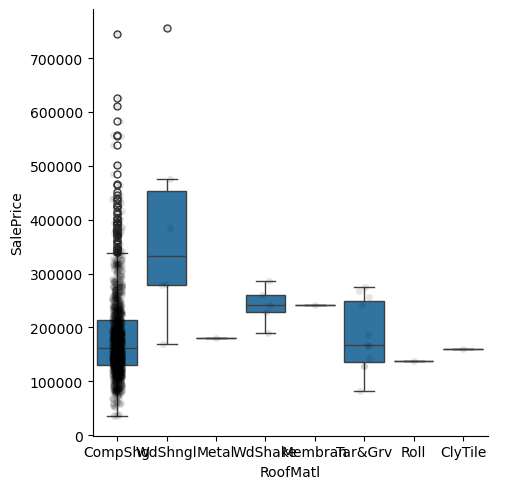

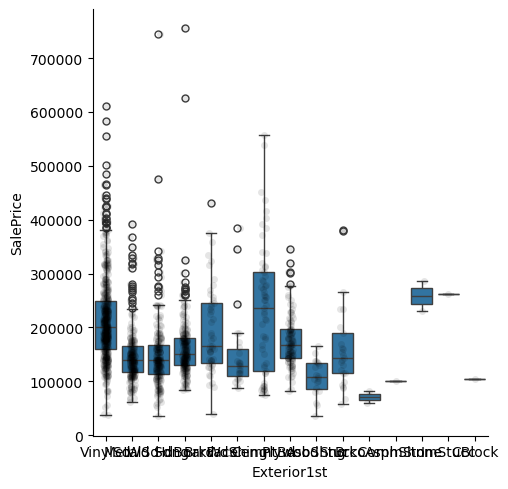

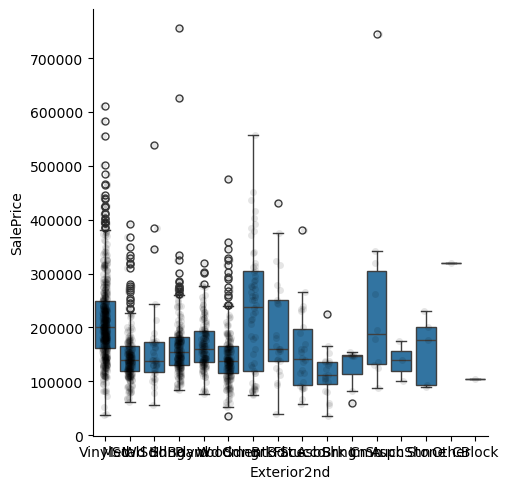

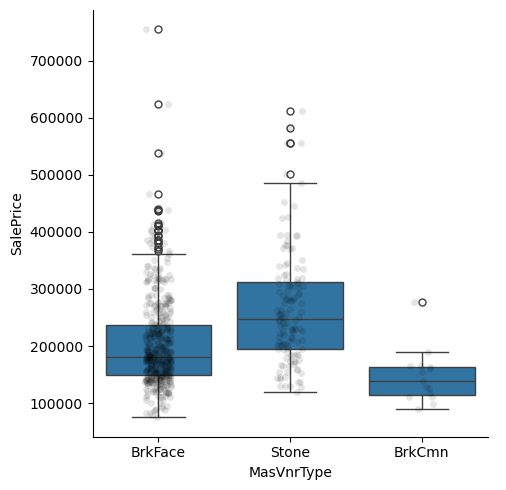

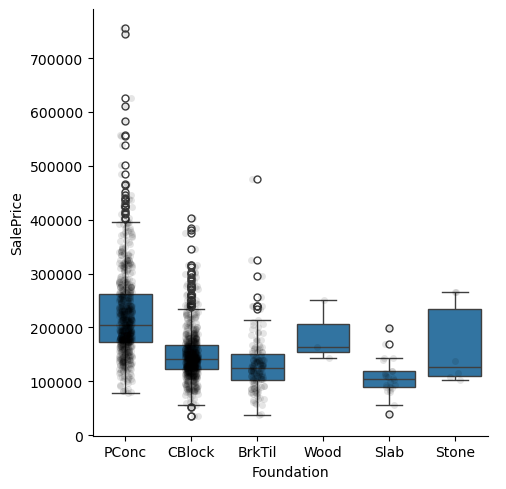

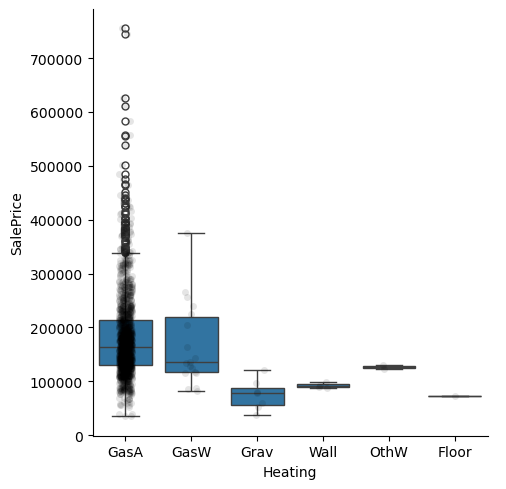

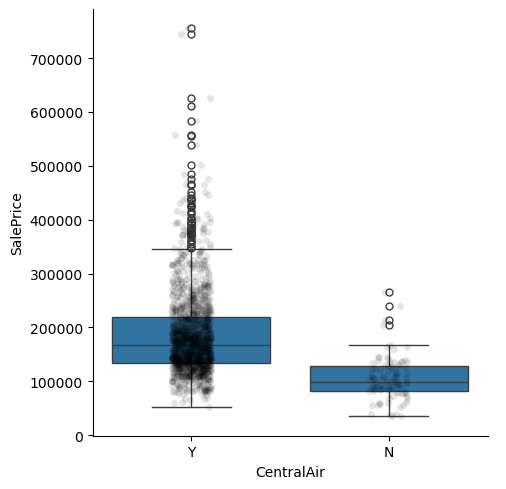

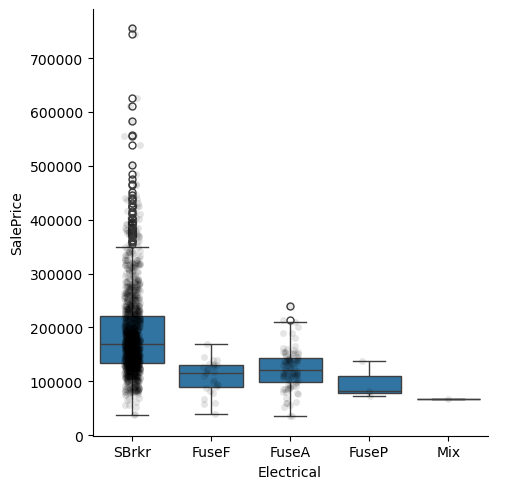

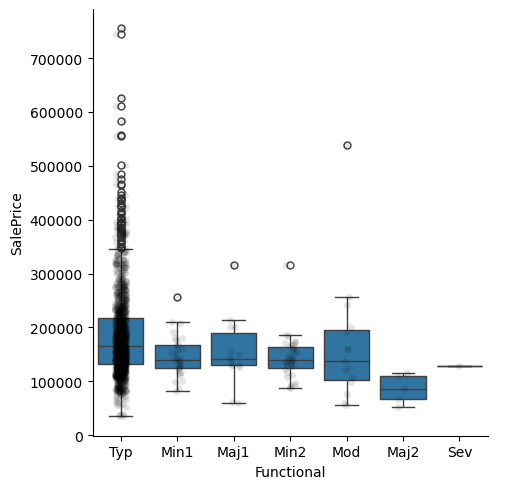

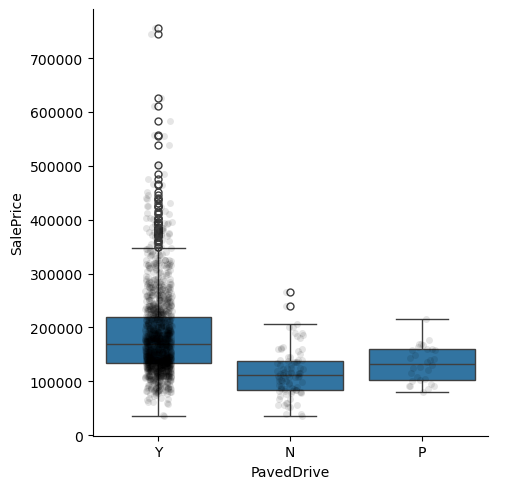

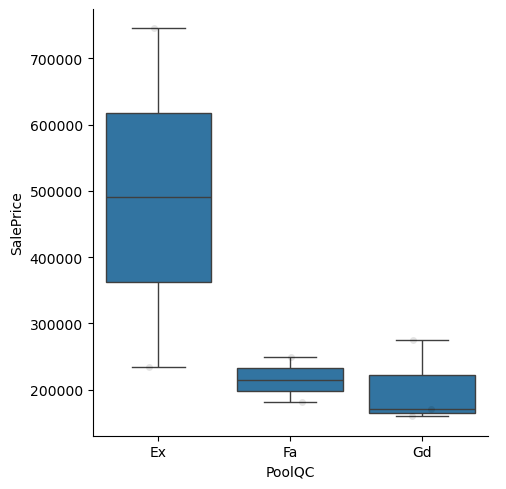

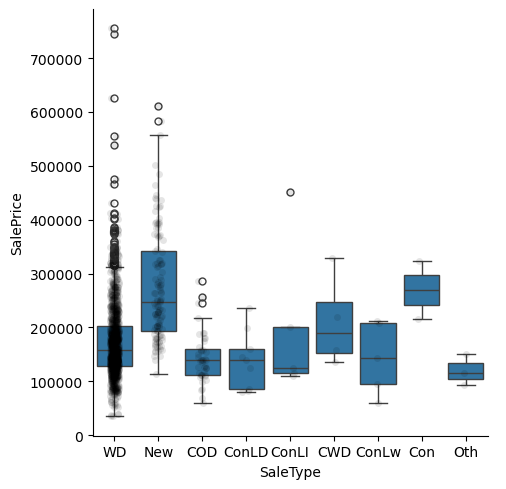

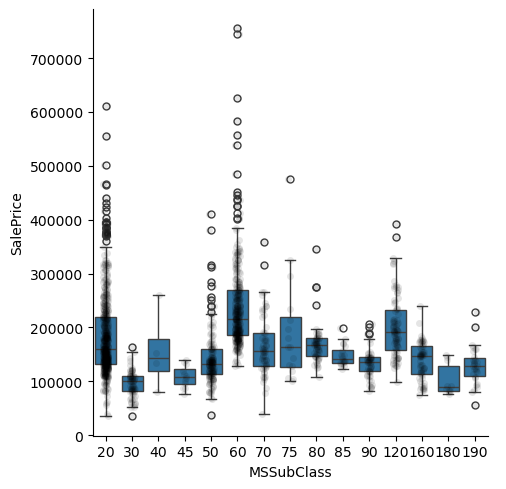

In [50]:
for var in cat_others:
    sns.catplot(x=var, y='SalePrice', data=data, kind='box')
    sns.stripplot(x=var, y='SalePrice', data=data, color='k', alpha=0.1)
    plt.show()